In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

#input data

df=input_data.read_data_sets('/tmp/data/',one_hot=True)
num_input=784 #28*28=784
num_h1=256
num_h2=128
x=tf.placeholder('float',shape=[None,num_input])
batch_size=256
num_step=40000
learning_rate=5e-3
display_step=100

#creating network architecture
def encoder_layer(x):
    li=tf.add(tf.matmul(x,W["w1"]),b['b1'])
    li=tf.nn.sigmoid(li)
    li=tf.add(tf.matmul(li,W["w2"]),b['b2'])
    li=tf.nn.sigmoid(li)
    return li

def decorder_layer(x):
    l2=tf.add(tf.matmul(x,W["w3"]),b['b3'])
    l2=tf.nn.sigmoid(l2)
    l2=tf.add(tf.matmul(l2,W["w4"]),b['b4'])
    l2=tf.nn.sigmoid(l2)
    return l2

#weight and bias
W={"w1":tf.Variable(tf.random_normal([num_input,num_h1])),
   "w2":tf.Variable(tf.random_normal([num_h1,num_h2])),
   "w3":tf.Variable(tf.random_normal([num_h2,num_h1])),
   "w4":tf.Variable(tf.random_normal([num_h1,num_input]))}

b={"b1":tf.Variable(tf.random_normal([num_h1])),
   "b2":tf.Variable(tf.random_normal([num_h2])),
   "b3":tf.Variable(tf.random_normal([num_h1])),
   "b4":tf.Variable(tf.random_normal([num_input]))}

#model architecture
encoder_fun=encoder_layer(x)
decoder_fun=decorder_layer(encoder_fun)

predicted=decoder_fun
actual=x

#cost function

cost_fn=tf.reduce_mean(tf.pow(actual-predicted,2))
optimize=tf.train.RMSPropOptimizer(learning_rate=learning_rate)
training=optimize.minimize(cost_fn)

#initialize the variable
init=tf.global_variables_initializer()
loss1=[]
with tf.Session() as sess:
    sess.run(init)
    for step in range(1,num_step+1):
        batch_x,_=df.train.next_batch(batch_size)
        sess.run(training,feed_dict={x:batch_x})
        if step % display_step==0 or step==1 :
            loss,_=sess.run([cost_fn,training],feed_dict={x:batch_x})
            loss1.append(loss)
            #print("step"+ str(step) +", Minibatch loss=" +  \ "{:.4f}".format(loss))
            print(loss)
    print("optimization_finished")
    plt.plot(loss)
    print(loss1)
    #testing
    
    #encode and decode the image from test set and visualize their reconstruction
    n=4
    convas_orig=np.zeros((28*n,28*n))
    convas_recon=np.zeros((28*n,28*n))
    
    for i in range(n):
        batch_x,_=df.test.next_batch(n)
        g=sess.run(decoder_fun,feed_dict={x:batch_x})
        #original image
        for j in range(n):
            convas_orig[i*28:(i+1)*28,j*28:(j+1)*28]=batch_x[j].reshape([28,28])
        #reconstructed image
        for j in range(n):
            convas_recon[i*28:(i+1)*28,j*28:(j+1)*28]=g[j].reshape([28,28])
    
    print("original_image")
    plt.figure(figsize=(n,n))
    plt.imshow(convas_orig,origin='upper',cmap='gray')
    plt.show()
    
    
    print('reconstucted image')
    plt.figure(figsize=(n,n))
    plt.imshow(convas_recon,origin='upper',cmap='gray')
    plt.show()
plt.imshow(loss1)  
plt.show()
    
    
        
        
    

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Colocations handled automatically by placer.
0.43815246
0.43127915
0.22523071
0.19528356
0.18239605
0.1714135
0.16414654
0.16064993
0.15598248
0.1539833
0.15177396
0.14718151
0.1457845
0.14578256
0.14347921
0.13997921
0.1378898
0.13603471
0.13526073
0.13485262
0.13396737
0.1298

original_image


<Figure size 640x480 with 1 Axes>

<Figure size 400x400 with 1 Axes>

reconstucted image


<Figure size 400x400 with 1 Axes>

TypeError: Invalid dimensions for image data

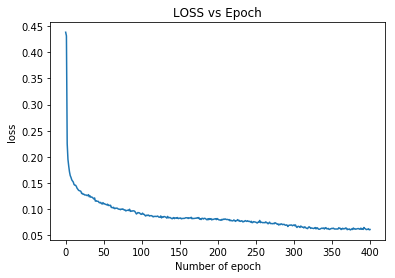

In [3]:
plt.title('LOSS vs Epoch')
plt.xlabel('Number of epoch')
plt.ylabel('loss')
plt.plot(loss1)